<a href="https://colab.research.google.com/github/alexandraeremia06/Kaggle/blob/main/Complex_Linear_Regression_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Le Wagon logo" src="https://wagon-public-datasets.s3.amazonaws.com/logo-lewagon.svg" width=400>

# Predicting house prices

In this challenge, you'll be using your newly acquired Linear Regression skills to try **to predict house prices in Ames, Iowa!**

You'll have to do some more complex preprocessing.

**Let's get started!**

## Import the Data

Start by importing the data. We give you the url.

👉 Load it into a dataframe!

In [ ]:
url = "https://wagon-public-datasets.s3.amazonaws.com/data-analytics/07-Machine-Learning/02-Python-For-AI-Regression/Iowa_housing_prices.csv"

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [8]:
import pandas as pd
df = pd.read_csv ("https://wagon-public-datasets.s3.amazonaws.com/data-analytics/07-Machine-Learning/02-Python-For-AI-Regression/Iowa_housing_prices.csv")

In [9]:
# load into a pd.DataFrame
f_df = pd.DataFrame(df)

In [17]:
display(f_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [16]:
display(f_df.info)

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]>

## Cleaning

### Handle NA values

Unlike the previous challenge, this dataset **has not been cleaned**!

The first thing to take care of are NA values!

👉 Which columns have missing values?

<details>
<summary markdown='span'>Hint</summary>

Quick and dirty (and not very readible): `df.info()`

To know the number of columns with null values, build up your solution with these steps:
- Start with `df.isnull()`
- Take the `sum()` to count the number of empty values per column
- Check which ones are larger than 0
- Take the sum of that result

Build a nice overview:
- Start with `df.isnull()`
- Take the `sum()` to count the number of empty values per column
- Use `.sort_values()` to sort the result (play with the `ascending` parameter)
- Then show only the top x rows
- You prefer a chart? Add a `.plot(kind='bar') at the end
- You want percentages? Just replace the `.sum()` with something else. Think about it.

</details>

<br>

<details>
<summary markdown='span'>Solution for the number of columns</summary>

```python
(df.isnull().sum() > 0).sum()
```

</details>

<br>

<details>
<summary markdown='span'>Solution to plot the columns with the most missing values</summary>

```python
df.isnull().sum().sort_values(ascending=False).head(19).plot(kind='bar');
```

</details>

In [37]:
df_null = df.isnull().sum()
df_null[df_null>0].index
#df_null[df_null>0]

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

<Axes: >

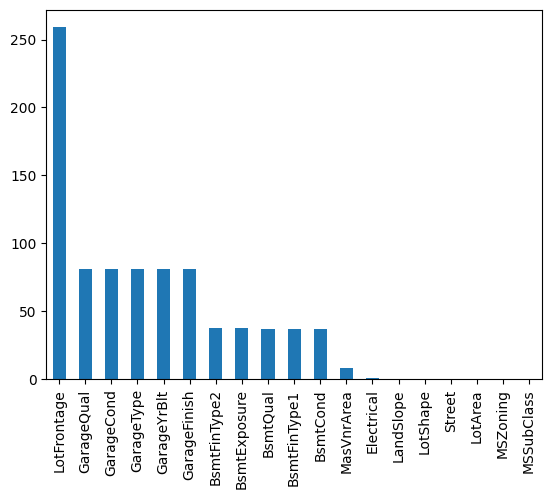

In [35]:
# df.info()
# df.isnull().sum() OR
# df.isnull(.mean().sort_value()

df.isnull().sum().sort_values(ascending=False).head(19).plot(kind='bar')

In [24]:
# Display percentage of missing values
missing_percentages = df.isnull().sum() / len(df) * 100
missing_percentages = missing_percentages.sort_values(ascending=False)
display(missing_percentages[missing_percentages > 0])


,0
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageQual,5.547945
GarageFinish,5.547945
GarageType,5.547945


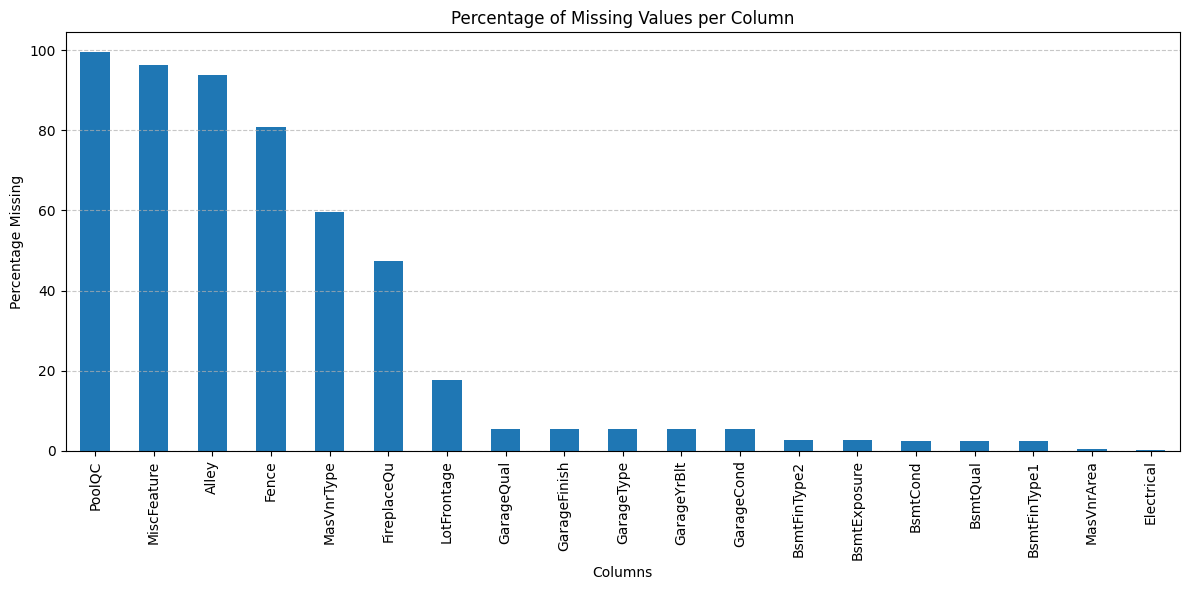

In [25]:
# plot the columns with the most missing values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
missing_percentages[missing_percentages > 0].head(20).plot(kind='bar')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [22]:
# df.info()
df.isnull().sum()

### To drop or to fill?

Some columns miss many more values than others!

Typically we drop columns that have more than 30% missing values.

The other columns, we will replace the missing values by something else. Typically you'd use the `mean` or `median`, or the `mode`.

We'll do that in the next steps, but let's first remove the columns with more than 30% missing values.

You can do it by explicitly creating a list of column names to drop. Extra points if you can do it without doing that. 🤓

👉 Remove the columns with more than 30% missing values

In [26]:
cols_to_drop = missing_percentages[missing_percentages > 30].index
df = df.drop(columns=cols_to_drop)


Looks good. Let's have a look at the remaining columns.

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

What's with that first column? That's the `Id`. That's just an identifier, not any data we can use to build a model.

👉 Drop that column.

In [45]:
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])


## Picking X and y

After cleaning, we are left with 74 columns/features. That's a lot to choose from! If we were experts in real estate, we could use our domain knowledge and pick out features we know are important!

However, we're not taking that approach today. We'll use all of the features to try to reach a prediction, all 74 of them!

👉 Assign `X` and `y` appropriately! Keep in mind that we are trying to predict house prices!

In [46]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']


### Train test split
As always, we need to split the data into train and test!

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Imputing missing values

After the previous step, we still have some missing values. Let's "impute" them. That's machine learning lingo for replacing the missing values with other (reasonable) values.

### Numeric Values

Let's start with the numeric missing values. We will impute those with the `mean`. Alternatively you could use the `median`.

You haven't seen scikit-learn Imputers yet, so we'll guide you through it. You'll see that they are very similar to the other transformers you used before (scalers and encoders).

Let's start by importing the `SimpleImputer` and creating a numeric inputer:

In [49]:
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='mean').set_output(transform='pandas')

What's that `.set_output(transform='pandas')`? This way the output of our transformer will be a nice DataFrame and not a basic NumPy array. 💪 How cool is that!?

👉 Let's continue. Up to you to make two variables `X_train_num` and `X_test_num` that contain only number features.

<details>
<summary>Hint</summary>

Use `select_dtypes()` with the right option.

</details>

In [50]:
x_train_num = X_train.select_dtypes(include='number')
x_test_num = X_test.select_dtypes(include='number')

Now fit the `num_imputer` on the train data and transform the train and the test data. (Only on the numeric data!)

👉 Save the transformed data into `X_train_num_imputed` and `X_test_num_imputed`.

<details>
<summary>Hint</summary>

`fit_transform` on your train set and `transform` your test set.

</details>

In [52]:
X_train_num_imputed = num_imputer.fit_transform(x_train_num)
X_test_num_imputed = num_imputer.transform(x_test_num)


In [53]:
# run this cell to quickly check that you have no missing values anymore
# if the output is empty, you're all good! fingers crossed!!!
assert X_train_num_imputed.isnull().sum().sum() == 0
assert X_test_num_imputed.isnull().sum().sum() == 0


### Non-Numeric Values

Now let's try to do the same for the non-numeric columns! Use `select_dtypes` again and maybe change that `include` to something else? Have a look at the documentation!

After you've selected the non-numeric columns, use a **new** `SimpleImputer` to encode the data! This time we can't use the `mean` strategy because we have categorical data. So let's use the `most_frequent` strategy.

👉 Save the results into `X_train_cat_imputed` and `X_test_cat_imputed`.

In [55]:
X_train_cat = X_train.select_dtypes(include='object')
X_test_cat = X_test.select_dtypes(include='object')

cat_imputer = SimpleImputer(strategy='most_frequent').set_output(transform='pandas')

X_train_cat_imputed = cat_imputer.fit_transform(X_train_cat)
X_test_cat_imputed = cat_imputer.transform(X_test_cat)


## Normalization (Scaling)

We have imputed our data and we have no missing values left. So it's time to scale our data! We'll only do this on our numeric data.

👉 Scale the data

<details>
<summary>Hint:</summary>

Use scikit-learn's `StandardScaler`. And do yourself a favour: use `.set_output(transform='pandas')` like we did for our imputer.

Start from your `X_train_num_imputed` and `X_test_num_imputed`.

</details>

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform='pandas')

X_train_num_scaled = scaler.fit_transform(X_train_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)


In [70]:
# run this cell to quickly check that you have no missing values anymore
# if the output is empty, you're all good!
assert X_train_num_scaled.isnull().sum().sum() == 0
assert X_test_num_scaled.isnull().sum().sum() == 0

## Encoding Categorical Values

Now let's do the essential preprocessing step for the non-numeric columns! Start from your `X_train_cat_imputed` and `X_test_cat_imputed`.

👉 Use `OneHotEncoder` to encode the data! Use `.set_output(transform='pandas')` again.

Do you get a long **error** saying `ValueError: Pandas output does not support sparse data. ...` at the end? Set the `sparse_output=False` parameter for your encoder.

Do you get a long **error** saying `ValueError: Found unknown categories ...` at the end? That's because the encoder encountered categories in the test set that it hadn't seen in the training set. That's indeed possible. We don't want it to give us an error. A warning should be enough. So set the `handle_unknown='warn'` parameter for your encoder. We'll still get a message, but it's only a warning: the encoder will encode zeros and we can move on.

In [71]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='warn').set_output(transform='pandas')

X_train_cat_encoded = encoder.fit_transform(X_train_cat_imputed)
X_test_cat_encoded = encoder.transform(X_test_cat_imputed)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [13, 27] during transform. These unknown categories will be encoded as all zeros



Have a look at your encoded columns.

In [72]:
display(X_train_cat_encoded.head())
display(X_test_cat_encoded.head())


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
254,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1066,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
638,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
799,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
380,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1105,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
413,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
522,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1036,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Bring numeric and non-numeric preprocessed data back together

Now we'll combine (`concat`enate) the numeric and non-numeric preprocessed columns together!

👉 Store the results in `X_train_preprocessed` and `X_test_preprocessed`.

In [73]:
X_train_preprocessed = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_preprocessed = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)


## Finally! Time to model a Linear Regression!

Let's try to use a Linear Regression to model house prices.

👉 Instantiate and fit a model!

In [74]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_preprocessed, y_train)


LinearRegression()

### Calculate the MAE

👉 Let's now calculate the mean absolute error of the model on the test set.

In [76]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test_preprocessed)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on Test Set: {mae:.2f}")

# Mean Absolute Error on Test Set: 18375.60 vs train set: 12915.80
# the model is more accurate on the data it learned from (train set) than on new data (test set).
# the difference between these two numbers can sometimes suggest a bit of overfitting, where the model learned the training
# data too well, making it slightly less generalizable to new data.

Mean Absolute Error on Test Set: 18375.60


In [78]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_train_preprocessed)
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean Absolute Error on Train Set: {mae:.2f}")

Mean Absolute Error on Train Set: 12915.80


The number you get represents the amount, in dollars, by which we were wrong about house prices!

Is this good or not?

To say, you have to compare against a baseline. Let's compare against what we'd get if we always predicted the mean house price.

👉 Run this cell

In [69]:
y_pred_mean = [y_train.mean() for y in y_test]
mean_absolute_error(y_test, y_pred_mean)


62575.926451960964

We're definitely doing better than just using the mean, but we're still quite far off.

### How could we improve our model?

Predicting house prices is, believe it or not, a very complex endeavour! There's not one single quality that determines house prices well, it's one large complex soup of features.

Furthermore, there is a good probability that this is a **non-linear** task! Which would mean that our Linear Regression is ill-suited to handle it.

Whenever you encounter the limitations of a Linear Regression, there's a couple of things that you could try:

- See if there aren't any features that look *numeric* but that are *categorical* in reality.
- Apply some regularization techniques
- Create new features (e.g. the ratio of bathrooms to bedrooms in this case)
- Try more complex non-linear models

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train_preprocessed, y_train)


GradientBoostingRegressor()

In [87]:
y_pred = model.predict(X_test_preprocessed)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error for Gradient Boosting Regressor on Test Set: {mae:.2f}")

Mean Absolute Error for Gradient Boosting Regressor on Test Set: 16729.49
